## PREDICCION DE TAQUILLA

### EDA

In [10]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analisis de datos exploratorios

In [12]:
df=pd.read_csv("Student.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

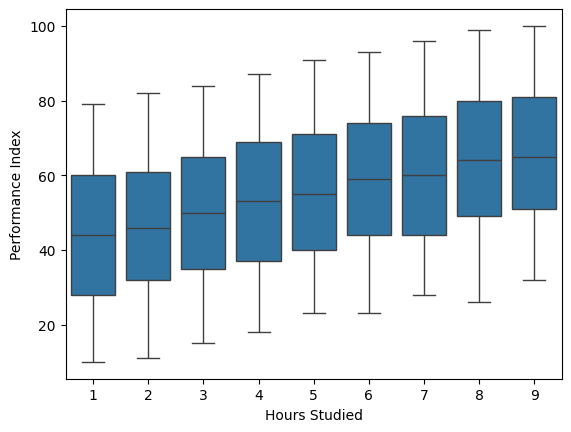

In [ ]:
sns.boxplot(x='Hours Studied',y='Performance Index',data=df)
# a medida que las horas de estudio aumentan el resultado mejora

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

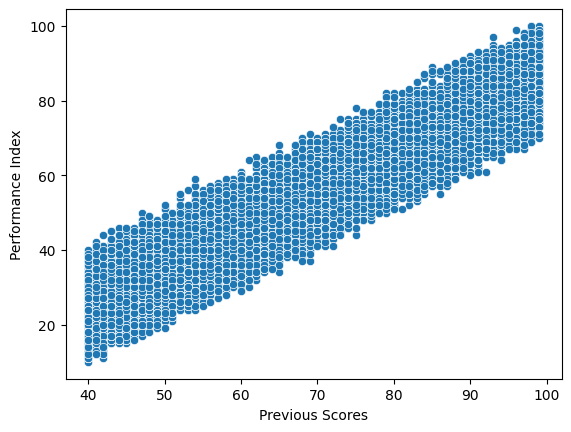

In [58]:
sns.scatterplot(x='Previous Scores',y='Performance Index',data=df)
# a medida que los puntajes aumentan el preformance tambien

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

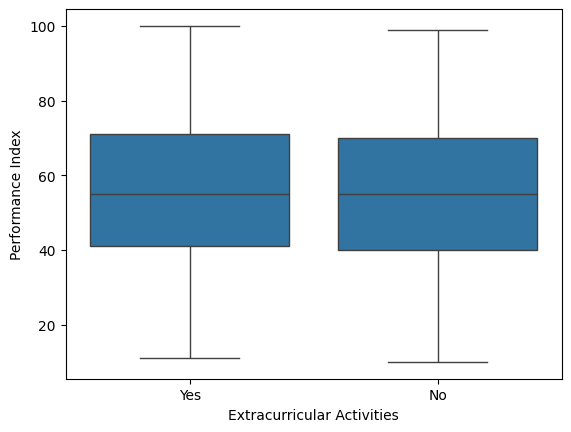

In [ ]:
sns.boxplot(x='Extracurricular Activities',y='Performance Index',data=df)
# no muestra una diferencia significativa en el rendimiento entre los estudiantes que hacen actividades extracurriculares y los que no.

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

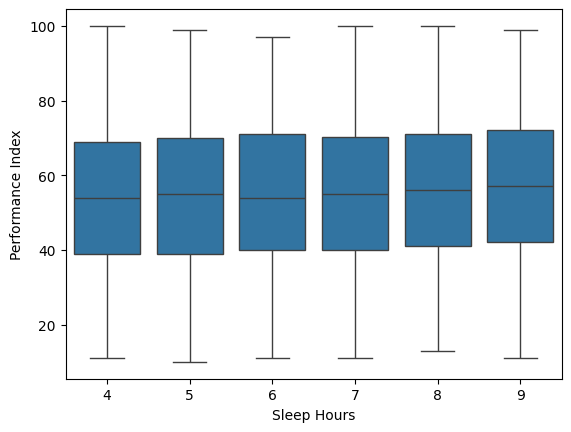

In [ ]:
sns.boxplot(x='Sleep Hours',y='Performance Index',data=df)
# las horas de sueño, dentro de este rango, no tienen un impacto significativo

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

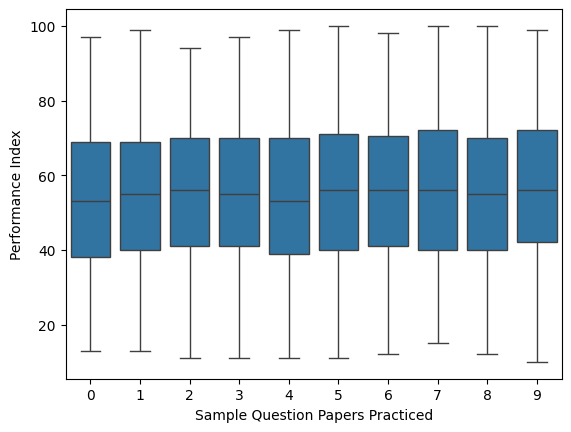

In [ ]:
sns.boxplot(x='Sample Question Papers Practiced',y='Performance Index',data=df)
# practicar más con practicas de prueba está asociado con un mejor rendimiento

## Preprocesamiento 

In [ ]:
# se transforman los tados de string a booleanos
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Extracurricular Activities"]=le.fit_transform(df["Extracurricular Activities"])
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


<Axes: >

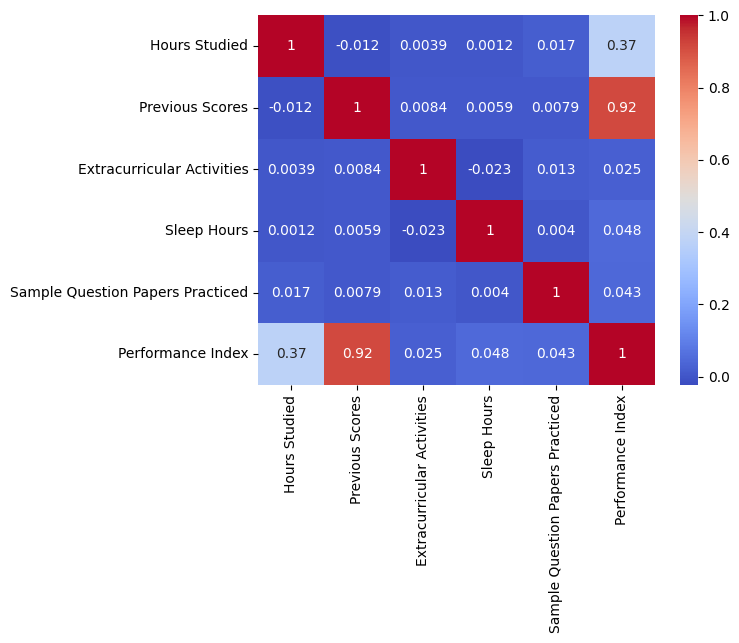

In [ ]:
# nos permite ver la correlación entre las variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Algoritmo de regresion lineal

In [ ]:
# se identificas las variables dependiendtes y la variable objetivo 
#(se elimino de las variables dependientes a Performance Indez de las variables dependientes para que el modelo no se guie de esa variable)
x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

In [ ]:
# divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) 

In [ ]:
#Entrenamiento del modelo de regresion lineal
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#valores de predichos por el modelo
y_pred=model.predict(x_test)
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077], shape=(3000,))

## Evaluacion de modelo 

In [51]:
# Crear un DataFrame con las filas de test y agregar la predicción
df_test = x_test.copy()
df_test['Performance Index (Original)'] = y_test
df_test['Performance Index (Predicho)'] = y_pred
df_test.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index (Original),Performance Index (Predicho)
6252,5,69,0,8,2,51.0,54.747286
4684,2,46,1,4,8,20.0,22.618844
1731,7,56,1,7,5,46.0,47.936651
4742,6,42,1,8,5,28.0,31.340099
4521,7,53,0,4,6,41.0,43.059743


In [ ]:
# Valor predicho cuando todas las variables independientes son 0")
print("Intercepto (B0):", model.intercept_)

 # Cambio en la predicción por cada unidad de cada variable")
print("Coeficientes (B1):", model.coef_)

# Lista de variables independientes correspondientes a los coeficientes")
print("Variables generadas:", x_test.columns.tolist())

Intercepto (B0): -33.836543807141716
Coeficientes (B1): [2.85895223 1.01551979 0.58171285 0.47967676 0.19039416]
Variables generadas: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


### Métricas utilizadas

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas
#promedio de errores cuadraticos
mse = mean_squared_error(y_test, y_pred)

# valor de desviacion de la prediccion
rmse = np.sqrt(mse)

#error promedio absoluto
mae = mean_absolute_error(y_test, y_pred)

#porcentaje de variabilidad explicada por el modelo
r2 = r2_score(y_test, y_pred)

# Mostrar resultados en un solo bloque
print(f"""
Evaluación del modelo:
---------------------
MSE  : {mse:.4f}
RMSE : {rmse:.4f}
MAE  : {mae:.4f}
R²   : {r2:.4f}
""")




Evaluación del modelo:
---------------------
MSE  : 4.0666
RMSE : 2.0166
MAE  : 1.6090
R²   : 0.9890



In [ ]:
# Guardar el modelo entrenado en un archivo usando pickle

import pickle

with open("modelo_notas.pkl", "wb") as f:
    pickle.dump(model, f)
